<a href="https://colab.research.google.com/github/MingzheHu-Duke/CS534-Machine-Learning/blob/main/CS534_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 2 - Linear Discriminant Analysis**

Class 1:  
Covariance Matrix: $$[\begin{smallmatrix} 2&-1\\ -1&1 \end{smallmatrix}]$$  
Expectation: $$[\begin{smallmatrix} 2\\2 \end{smallmatrix}]$$  
  
Class 2:  
Covariance Matrix: $$[\begin{smallmatrix} 1&0.5\\ 0.5&1 \end{smallmatrix}]$$  
Expectation: $$[\begin{smallmatrix} 0\\0 \end{smallmatrix}]$$

Now Let's generate some sample points for the two bivariate normal distribution:  
When: **$$|\{X^{(k)}\}| = 10$$**

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
# Import the sympy dictionary to solve the equation
from sympy import  *
# To make it reproducible
random_seed = 2021

In [138]:
# Define the covariance matrices
cov_1 = np.array([[2, -1], [-1, 1]])
cov_2 = np.array([[1, 0.5], [0.5, 1]])
# Define the expected values
mu_1 = np.array([2, 2])
mu_2 = np.array([0, 0])

In [139]:
# Distributions
# Class 1
distr_1 = multivariate_normal(cov=cov_1, mean=mu_1, seed=random_seed)
# Class 2
distr_2 = multivariate_normal(cov=cov_2, mean=mu_2, seed=random_seed)

In [140]:
# Geneate the data points
data_1 = distr_1.rvs(size=10)
data_2 = distr_2.rvs(size=10)

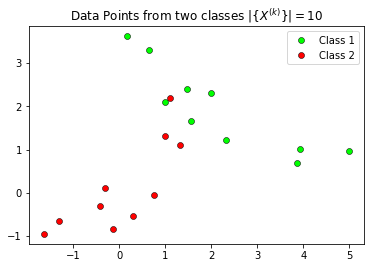

In [141]:
# Visualize the datas
plt.figure()
plt.plot(data_1[:, 0], data_1[:, 1], "o", c="lime", markeredgewidth=0.5, markeredgecolor="black", label="Class 1")
plt.plot(data_2[:, 0], data_2[:, 1], "o", c="red", markeredgewidth=0.5, markeredgecolor="black", label="Class 2")
plt.legend()
plt.title("Data Points from two classes $|\{X^{(k)}\}| = 10$")
plt.show()

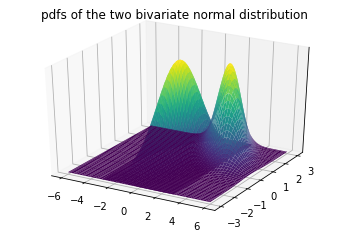

In [142]:
# Mean and variance of class 1 of x, y axis
mean1_x, mean1_y = mu_1[0], mu_1[1]
sigma1_x, sigma1_y = cov_1[0, 0], cov_1[1, 1]

mean2_x, mean2_y = mu_2[0], mu_2[1]
sigma2_x, sigma2_y = cov_2[0, 0], cov_2[1, 1]

# Meshgrid
x1 = np.linspace(-3*sigma1_x, 3*sigma1_x, num=100)
y1 = np.linspace(-3*sigma1_y, 3*sigma1_y, num=100)
X1, Y1 = np.meshgrid(x1, y1)

x2 = np.linspace(-3*sigma2_x, 3*sigma2_x, num=100)
y2 = np.linspace(-3*sigma2_y, 3*sigma2_y, num=100)
X2, Y2 = np.meshgrid(x2, y2)

# Plot the pdf
pdf1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
  for j in range(X1.shape[1]):
    pdf1[i, j] = distr_1.pdf([X1[i, j], Y1[i, j]])

pdf2 = np.zeros(X2.shape)
for i in range(X2.shape[0]):
  for j in range(X2.shape[1]):
    pdf2[i, j] = distr_2.pdf([X2[i, j], Y2[i, j]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, Y1, pdf1, cmap="viridis")
ax.plot_surface(X2, Y2, pdf2, cmap="viridis")
ax.axes.zaxis.set_ticks([])
plt.title("pdfs of the two bivariate normal distribution")
plt.tight_layout
plt.show()

**2.a. Linear discriminant**  
**$$|\{X^{(k)}\}| = 10$$**

2.a.1  
LDA decision boundary $\{x|\delta(x) = 0\}$

To use the LDF (Linear Discriminant function) we need to first find the statistical mean and statistical covariance.

In [143]:
# Compute the statistical mean
def stats_mean(data):
  mean_ans = sum(data)/data.shape[0]
  print("The statistical Mean of given data is:\n" + str(mean_ans))
  return mean_ans

In [146]:
# Compute the statistical variance
def stats_covariance(data, mean, class_num):
  cov_ans = 0
  for i in range(data.shape[0]):
    xi = np.array([[data[i, 0], data[i, 1]]])
    xi_centered = xi - mean
    cov_ans += np.matmul(np.transpose(xi_centered), xi_centered)
  print("The statistical Covariance Matrix is:")
  print(cov_ans/(data.shape[0] - class_num))
  return cov_ans/(data.shape[0] - class_num)

Now let's compute the stats mean of class 1 & class2, and stats covariance of all the data.

In [151]:
# Class 1 mean
print("Class 1:")
mean1 = stats_mean(data_1)
print("\n")
print("Class 2:")
# Class 2 mean
mean2 = stats_mean(data_2)

Class 1:
The statistical Mean of given data is:
[2.19393567 1.9291686 ]


Class 2:
The statistical Mean of given data is:
[0.07448915 0.14196963]


In [153]:
# Stack the two class together
data = np.vstack((data_1, data_2))

print("All data:")
# The total mean
mean = stats_mean(data) 
print("\n")
print("All data:")
# The total covariance
cov = stats_covariance(data, mean, 2)

All data:
The statistical Mean of given data is:
[1.13421241 1.03556911]


All data:
The statistical Covariance Matrix is:
[[3.00784893 0.77786761]
 [0.77786761 1.94390946]]


Now we want to calculate the decision boundary function ${\delta}_1(x) = {\delta}_2(x)$  
To solve the equation, we use sympy library.

In [156]:
x, y = symbols("x, y", real=True)

In [185]:
sigma1 = (Matrix([x, y]).T*Matrix(cov).inv()*Matrix(mean1) - 1/2*Matrix(mean1).T*Matrix(cov).inv()*Matrix(mean1))[0] + log(0.5)
sigma2 = (Matrix([x, y]).T*Matrix(cov).inv()*Matrix(mean2) - 1/2*Matrix(mean2).T*Matrix(cov).inv()*Matrix(mean2))[0] + log(0.5)

In [192]:
# Solve the equation and find the line
expr = sigma1 - sigma2
ans1 = solve(expr, y)[0]
ans1

1.86631830294182 - 0.73244586402137*x

2.a.2  
Theoretical Bayes decison boudary: $\{x|f_{X(1)} = f_{X(2)}\}$

$\implies \frac{f_{X(1)}}{f_{X(2)}} = 1$  
$\implies log(\frac{f_{X(1)}}{f_{X(2)}}) = 0$  
$\implies -\frac{1}{2}(\mu_1 + \mu_2)^T\Sigma^{-1}(\mu_1 - \mu_2) + x^T\Sigma^{-1}(\mu_1 - \mu_2) = 0$

In [208]:
# The sigma here is the average of the two covariance matrices
sigma = (cov_1 + cov_2)/2
print("The LDA covariance matix of theoretical Bayes is:")
sigma

The LDA covariance matix of theoretical Bayes is:


array([[ 1.5 , -0.25],
       [-0.25,  1.  ]])

In [243]:
expr = Matrix([-1/2]) * (Matrix(mu_1) + 
              Matrix(mu_2)).T*Matrix(sigma).inv()*(Matrix(mu_1) 
              - Matrix(mu_2)) + Matrix([x, 
              y]).T*Matrix(sigma).inv()*(Matrix(mu_1) - Matrix(mu_2))

In [244]:
ans2 = solve(expr[0], y)[0]
ans2

1.71428571428571 - 0.714285714285714*x

2.a.3  
Empirical Bayes decision boundary: $\{x|\hat{f}_{X(1)} = \hat{f}_{X(2)}\}$  
  
Since in this homework we have equal numer of samples from both class, we should expect a same answer as 2.a.1

In [246]:
expr = Matrix([-1/2]) * (Matrix(mean1) + 
              Matrix(mean2)).T*Matrix(cov).inv()*(Matrix(mean1) 
              - Matrix(mean2)) + Matrix([x, 
              y]).T*Matrix(cov).inv()*(Matrix(mean1) - Matrix(mean2))

In [247]:
ans3 = solve(expr[0], y)[0]
ans3

1.86631830294182 - 0.73244586402137*x

As we can see that it is actually the same as question 1.a.1

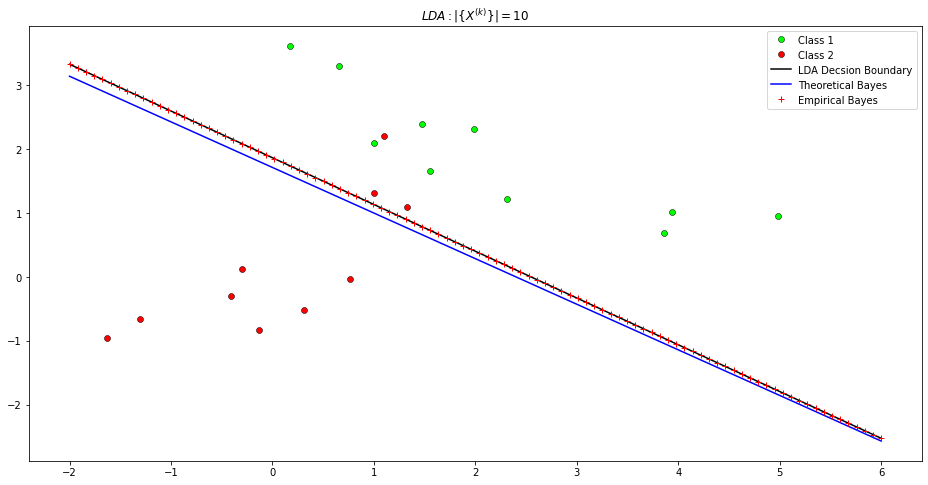

In [282]:
plt.figure(figsize=(16, 8))
plt.plot(data_1[:, 0], data_1[:, 1], "o", c="lime", markeredgewidth=0.5, markeredgecolor="black", label="Class 1")
plt.plot(data_2[:, 0], data_2[:, 1], "o", c="red", markeredgewidth=0.5, markeredgecolor="black", label="Class 2")
x_vals = np.linspace(-2, 6, 100)
plot1 = 1.86631830294182 - 0.73244586402137 * x_vals
plot2 = 1.71428571428571- 0.714285714285714 * x_vals
plot3 = 1.86631830294182 - 0.73244586402137 * x_vals
plt.plot(x_vals, plot1, "black", label="LDA Decsion Boundary")
plt.plot(x_vals, plot2, "-b", label="Theoretical Bayes")
plt.plot(x_vals, plot3, "+r", label="Empirical Bayes")
plt.legend()
plt.title("$\it{LDA}: |\{X^{(k)}\}| = 10$")
plt.show()

**2.b. Linear discriminant**  
**$$|\{X^{(k)}\}| = 1000$$**

2.b.1

In [283]:
# Geneate the data points
data_1 = distr_1.rvs(size=1000)
data_2 = distr_2.rvs(size=1000)

In [284]:
# Class 1 mean
print("Class 1:")
mean1 = stats_mean(data_1)
print("\n")
print("Class 2:")
# Class 2 mean
mean2 = stats_mean(data_2)

Class 1:
The statistical Mean of given data is:
[1.99189122 2.02932913]


Class 2:
The statistical Mean of given data is:
[-0.02867996  0.00479039]


In [285]:
# Stack the two class together
data = np.vstack((data_1, data_2))

print("All data:")
# The total mean
mean = stats_mean(data) 
print("\n")
print("All data:")
# The total covariance
cov = stats_covariance(data, mean, 2)

All data:
The statistical Mean of given data is:
[0.98160563 1.01705976]


All data:
The statistical Covariance Matrix is:
[[2.44384662 0.78050194]
 [0.78050194 1.98425818]]


In [286]:
sigma1 = (Matrix([x, y]).T*Matrix(cov).inv()*Matrix(mean1) - 1/2*Matrix(mean1).T*Matrix(cov).inv()*Matrix(mean1))[0] + log(0.5)
sigma2 = (Matrix([x, y]).T*Matrix(cov).inv()*Matrix(mean2) - 1/2*Matrix(mean2).T*Matrix(cov).inv()*Matrix(mean2))[0] + log(0.5)

In [287]:
# Solve the equation and find the line
expr = sigma1 - sigma2
ans1 = solve(expr, y)[0]
ans1

1.72449864914228 - 0.720695632625025*x

2.b.2

In [288]:
# The sigma here is the average of the two covariance matrices
sigma = (cov_1 + cov_2)/2
print("The LDA covariance matix of theoretical Bayes is:")
sigma

The LDA covariance matix of theoretical Bayes is:


array([[ 1.5 , -0.25],
       [-0.25,  1.  ]])

In [290]:
expr = Matrix([-1/2]) * (Matrix(mu_1) + 
              Matrix(mu_2)).T*Matrix(sigma).inv()*(Matrix(mu_1) 
              - Matrix(mu_2)) + Matrix([x, 
              y]).T*Matrix(sigma).inv()*(Matrix(mu_1) - Matrix(mu_2))

ans2 = solve(expr[0], y)[0]
ans2

1.71428571428571 - 0.714285714285714*x

2.b.3

In [291]:
expr = Matrix([-1/2]) * (Matrix(mean1) + 
              Matrix(mean2)).T*Matrix(cov).inv()*(Matrix(mean1) 
              - Matrix(mean2)) + Matrix([x, 
              y]).T*Matrix(cov).inv()*(Matrix(mean1) - Matrix(mean2))

ans3 = solve(expr[0], y)[0]
ans3              

1.72449864914228 - 0.720695632625023*x

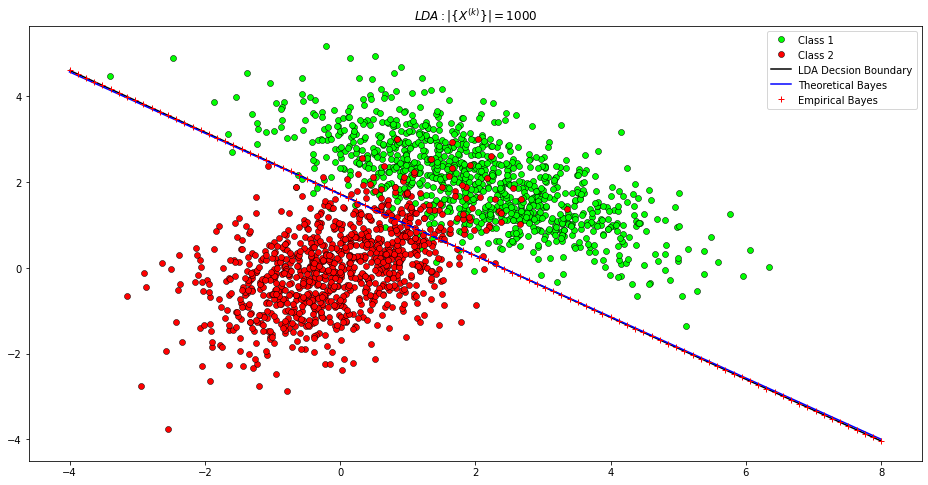

In [293]:
plt.figure(figsize=(16, 8))
plt.plot(data_1[:, 0], data_1[:, 1], "o", c="lime", markeredgewidth=0.5, markeredgecolor="black", label="Class 1")
plt.plot(data_2[:, 0], data_2[:, 1], "o", c="red", markeredgewidth=0.5, markeredgecolor="black", label="Class 2")
x_vals = np.linspace(-4, 8, 100)
plot1 = 1.72449864914228 - 0.720695632625023 * x_vals
plot2 = 1.71428571428571- 0.714285714285714 * x_vals
plot3 = 1.72449864914228 - 0.720695632625023 * x_vals
plt.plot(x_vals, plot1, "black", label="LDA Decsion Boundary")
plt.plot(x_vals, plot2, "-b", label="Theoretical Bayes")
plt.plot(x_vals, plot3, "+r", label="Empirical Bayes")
plt.legend()
plt.title("$\it{LDA}: |\{X^{(k)}\}| = 1000$")
plt.show()

**3.a. Quadratic discriminant**  
**$$|\{X^{(k)}\}| = 10$$**

3.a.1

In [363]:
# Geneate the data points
data_1 = distr_1.rvs(size=10)
data_2 = distr_2.rvs(size=10)

# Class 1 mean
print("Class 1:")
mean1 = stats_mean(data_1)
print("\n")
print("Class 2:")
# Class 2 mean
mean2 = stats_mean(data_2)

Class 1:
The statistical Mean of given data is:
[2.13190484 1.67096784]


Class 2:
The statistical Mean of given data is:
[ 0.32297622 -0.01769273]


In [364]:
# Th covariance
print("Class 1:")
cov1 = stats_covariance(data_1, mean1, 2)
print("\n")
print("Class 2:")
cov2 = stats_covariance(data_2, mean2, 2)

Class 1:
The statistical Covariance Matrix is:
[[ 1.06713106 -0.93659185]
 [-0.93659185  1.1897018 ]]


Class 2:
The statistical Covariance Matrix is:
[[1.1738126  0.34718817]
 [0.34718817 0.35338879]]


In [365]:
sigma1 = Matrix([-1/2])*log(Matrix(cov1).det()) - Matrix([1/2])*(Matrix([x, y]) - 
    Matrix(mean1)).T*Matrix(cov1).inv()*(Matrix([x, y]) - 
    Matrix(mean1)) + Matrix([log(0.5)])

sigma2 =  Matrix([-1/2])*log(Matrix(cov2).det()) - Matrix([1/2])*(Matrix([x, y]) - 
    Matrix(mean2)).T*Matrix(cov2).inv()*(Matrix([x, y]) - 
    Matrix(mean2)) + Matrix([log(0.5)])

In [366]:
expr = sigma1 - sigma2
solve(expr[0], y)[0]

2.81052844467979*x - 9.67002406559923*sqrt(0.0999045680018264*x**2 - 0.646966820219924*x + 1) - 7.9466797919747

In [367]:
solve(expr[0], y)[1]

2.81052844467979*x + 9.67002406559923*sqrt(0.0999045680018264*x**2 - 0.646966820219924*x + 1) - 7.9466797919747

In [368]:
print(solve(expr[0], y)[1])

2.81052844467979*x + 9.67002406559923*sqrt(0.0999045680018264*x**2 - 0.646966820219924*x + 1) - 7.9466797919747


3.a.2

In [369]:
sigma1 = Matrix([-1/2])*log(Matrix(cov_1).det()) - Matrix([1/2])*(Matrix([x, y]) - 
    Matrix(mu_1)).T*Matrix(cov_1).inv()*(Matrix([x, y]) - 
    Matrix(mu_1)) + Matrix([log(0.5)])

sigma2 =  Matrix([-1/2])*log(Matrix(cov_2).det()) - Matrix([1/2])*(Matrix([x, y]) - 
    Matrix(mu_2)).T*Matrix(cov_2).inv()*(Matrix([x, y]) - 
    Matrix(mu_2)) + Matrix([log(0.5)])

In [370]:
expr = sigma1 - sigma2
solve(expr[0], y)[0]

-2.5*x - 7.11115158686146*sqrt(0.133482367177215*x**2 - 0.652580461755273*x + 1) + 9.0

In [371]:
expr = sigma1 - sigma2
solve(expr[0], y)[1]

-2.5*x + 7.11115158686146*sqrt(0.133482367177215*x**2 - 0.652580461755273*x + 1) + 9.0

In [374]:
print(solve(expr[0], y)[1])

-2.5*x + 7.11115158686146*sqrt(0.133482367177215*x**2 - 0.652580461755273*x + 1) + 9.0


3.a.3  
As we have proved in 2.a.3, the result of 3.a.3 will also the same as 3.a.1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


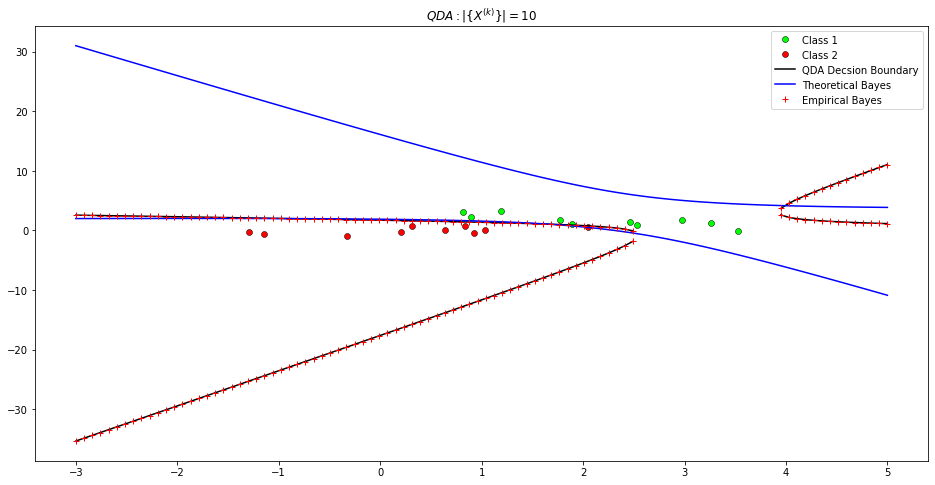

In [380]:
plt.figure(figsize=(16, 8))
plt.plot(data_1[:, 0], data_1[:, 1], "o", c="lime", markeredgewidth=0.5, markeredgecolor="black", label="Class 1")
plt.plot(data_2[:, 0], data_2[:, 1], "o", c="red", markeredgewidth=0.5, markeredgecolor="black", label="Class 2")
x_vals = np.linspace(-3, 5, 100)
plot1_1 = 2.81052844467979*x_vals + 9.67002406559923*np.sqrt(0.0999045680018264*x_vals**2 - 0.646966820219924*x_vals + 1) - 7.9466797919747
plot1_2 = 2.81052844467979*x_vals - 9.67002406559923*np.sqrt(0.0999045680018264*x_vals**2 - 0.646966820219924*x_vals + 1) - 7.9466797919747
plot2_1 = -2.5*x_vals + 7.11115158686146*np.sqrt(0.133482367177215*x_vals**2 - 0.652580461755273*x_vals + 1) + 9.0
plot2_2 = -2.5*x_vals - 7.11115158686146*np.sqrt(0.133482367177215*x_vals**2 - 0.652580461755273*x_vals + 1) + 9.0
plt.plot(x_vals, plot1_1, "black", label="QDA Decsion Boundary")
plt.plot(x_vals, plot1_2, "black")
plt.plot(x_vals, plot2_1, "-b", label="Theoretical Bayes")
plt.plot(x_vals, plot2_2, "-b")
plt.plot(x_vals, plot1_1, "+r", label="Empirical Bayes")
plt.plot(x_vals, plot1_2, "+r")
plt.legend()
plt.title("$\it{QDA}: |\{X^{(k)}\}| = 10$")
plt.show()

**3.b. Quadratic discriminant**  
**$$|\{X^{(k)}\}| = 1000$$**

3.b.1

In [381]:
# Geneate the data points
data_1 = distr_1.rvs(size=1000)
data_2 = distr_2.rvs(size=1000)

# Class 1 mean
print("Class 1:")
mean1 = stats_mean(data_1)
print("\n")
print("Class 2:")
# Class 2 mean
mean2 = stats_mean(data_2)

Class 1:
The statistical Mean of given data is:
[2.014224   2.00290571]


Class 2:
The statistical Mean of given data is:
[-0.00239101  0.01370802]


In [382]:
# Th covariance
print("Class 1:")
cov1 = stats_covariance(data_1, mean1, 2)
print("\n")
print("Class 2:")
cov2 = stats_covariance(data_2, mean2, 2)

Class 1:
The statistical Covariance Matrix is:
[[ 2.06416091 -1.03643622]
 [-1.03643622  1.01884266]]


Class 2:
The statistical Covariance Matrix is:
[[1.01988896 0.52492756]
 [0.52492756 1.02676895]]


In [383]:
sigma1 = Matrix([-1/2])*log(Matrix(cov1).det()) - Matrix([1/2])*(Matrix([x, y]) - 
    Matrix(mean1)).T*Matrix(cov1).inv()*(Matrix([x, y]) - 
    Matrix(mean1)) + Matrix([log(0.5)])

sigma2 =  Matrix([-1/2])*log(Matrix(cov2).det()) - Matrix([1/2])*(Matrix([x, y]) - 
    Matrix(mean2)).T*Matrix(cov2).inv()*(Matrix([x, y]) - 
    Matrix(mean2)) + Matrix([log(0.5)])

In [384]:
expr = sigma1 - sigma2
solve(expr[0], y)[0]

-2.46530958178448*x - 6.9002298319647*sqrt(0.138091023065078*x**2 - 0.664868893311079*x + 1) + 8.80525500388956

In [385]:
solve(expr[0], y)[1]

-2.46530958178448*x + 6.9002298319647*sqrt(0.138091023065078*x**2 - 0.664868893311079*x + 1) + 8.80525500388956

In [386]:
print(solve(expr[0], y)[1])

-2.46530958178448*x + 6.9002298319647*sqrt(0.138091023065078*x**2 - 0.664868893311079*x + 1) + 8.80525500388956


3.b.2

In [388]:
sigma1 = Matrix([-1/2])*log(Matrix(cov_1).det()) - Matrix([1/2])*(Matrix([x, y]) - 
    Matrix(mu_1)).T*Matrix(cov_1).inv()*(Matrix([x, y]) - 
    Matrix(mu_1)) + Matrix([log(0.5)])

sigma2 =  Matrix([-1/2])*log(Matrix(cov_2).det()) - Matrix([1/2])*(Matrix([x, y]) - 
    Matrix(mu_2)).T*Matrix(cov_2).inv()*(Matrix([x, y]) - 
    Matrix(mu_2)) + Matrix([log(0.5)])

In [389]:
expr = sigma1 - sigma2
solve(expr[0], y)[0]

-2.5*x - 7.11115158686146*sqrt(0.133482367177215*x**2 - 0.652580461755273*x + 1) + 9.0

In [390]:
expr = sigma1 - sigma2
solve(expr[0], y)[1]

-2.5*x + 7.11115158686146*sqrt(0.133482367177215*x**2 - 0.652580461755273*x + 1) + 9.0

3.b.3  
As we have proved in 2.a.3, the result of 3.b.3 will also the same as 3.b.1.

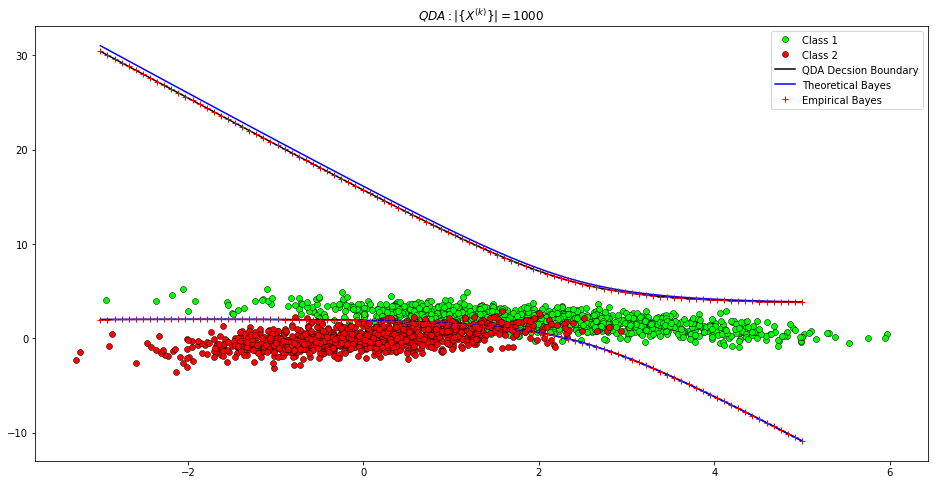

In [393]:
plt.figure(figsize=(16, 8))
plt.plot(data_1[:, 0], data_1[:, 1], "o", c="lime", markeredgewidth=0.5, markeredgecolor="black", label="Class 1")
plt.plot(data_2[:, 0], data_2[:, 1], "o", c="red", markeredgewidth=0.5, markeredgecolor="black", label="Class 2")
x_vals = np.linspace(-3, 5, 100)
plot1_1 = -2.46530958178448*x_vals + 6.9002298319647*np.sqrt(0.138091023065078*x_vals**2 - 0.664868893311079*x_vals + 1) + 8.80525500388956
plot1_2 = -2.46530958178448*x_vals - 6.9002298319647*np.sqrt(0.138091023065078*x_vals**2 - 0.664868893311079*x_vals + 1) + 8.80525500388956
plot2_1 = -2.5*x_vals + 7.11115158686146*np.sqrt(0.133482367177215*x_vals**2 - 0.652580461755273*x_vals + 1) + 9.0
plot2_2 = -2.5*x_vals - 7.11115158686146*np.sqrt(0.133482367177215*x_vals**2 - 0.652580461755273*x_vals + 1) + 9.0
plt.plot(x_vals, plot1_1, "black", label="QDA Decsion Boundary")
plt.plot(x_vals, plot1_2, "black")
plt.plot(x_vals, plot2_1, "-b", label="Theoretical Bayes")
plt.plot(x_vals, plot2_2, "-b")
plt.plot(x_vals, plot1_1, "+r", label="Empirical Bayes")
plt.plot(x_vals, plot1_2, "+r")
plt.legend()
plt.title("$\it{QDA}: |\{X^{(k)}\}| = 1000$")
plt.show()

**Conclusion:**  
+ As we can see from above. If we know how the data are generated (The generation probability density function). We can use the theoretical Bayes boundary to get the best classification result.  
+ By using the empirical Bayes decision boundary, the larger the sample is, the closer the empirical boundary is to the theoretical boundary.  
+ If the sample numbers of different class are the same, the empirical Bayes decision boundary will be the same as the LDA/QDA decision boundary.